In [1]:
from utils import *
from PIL import Image
import numpy as np

def add_images(image_arrays):
    # 确保列表中至少有一个数组
    if not image_arrays:
        raise ValueError("The image list is empty")

    # 使用第一个数组的形状作为基准
    base_array = np.array(image_arrays[0], dtype=np.float32)

    # 逐个数组相加
    for img_array in image_arrays[1:]:
        base_array += np.array(img_array, dtype=np.float32)

    # 将数组值归一化到0-255范围，并转换回uint8类型
    base_array = np.clip(base_array / len(image_arrays), 0, 255).astype(np.uint8)
    img_array = base_array.astype(np.uint8)
    image1 = Image.fromarray(img_array)
    # 如果图像有多个通道，转换为灰度图像（单通道）
    if image1.mode != 'L':
        image1 = image1.convert('L')

    return image1

def preprocess(public_image_path):
    # 打开图像文件
    image = Image.open(public_image_path)
    # 获取图像的绿色通道
    green_channel = np.array(image)[:, :, 1]  # Green channel is at index 1 (0-indexed)
    # 将图像的绿色通道resize到1024*1024
    green_channel_resized = Image.fromarray(green_channel).resize((1024, 1024))
    
    # 将PIL图像转换为OpenCV格式
    green_cv2 = cv2.cvtColor(np.array(green_channel_resized), cv2.COLOR_RGB2BGR)
    
    # 确保输入图像是单通道的灰度图像
    if len(green_cv2.shape) > 2:
        green_cv2 = cv2.cvtColor(green_cv2, cv2.COLOR_BGR2GRAY)
    
    # 创建 CLAHE 对象
    clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8,8))
    # 应用 CLAHE 对比度增强
    histe = clahe.apply(green_cv2)
    return Image.fromarray(histe)
    
def preprocess_withgs(public_image_path):
    a = show_all(public_image_path)
    scaled_list = scale_space_representation(a,7)
    return scaled_list
    

In [3]:
#预处理demo

imagepath="/home/u00483/repos/Semantic_Seg/projects/restructured2/dataset/eopt/image/C0001365.jpg"

#基本预处理
a1= preprocess(imagepath)
#rule-based预处理
gs7filter=preprocess_withgs(imagepath)
#叠加多个gsfilter
# result_image = add_images(gs7filter[])




In [11]:
#处理原图并存储
path = "./dataset/eopt/"

import os
from PIL import Image
import numpy as np

# 输入和输出路径
input_dir = path + 'image'
output_dirpre0 = path + '/preimage'
output_dirpregs1 = path + '/pre1image'
output_dirpregs2 = path + '/pre2image'
output_dirpregs3 = path + '/pre3image'
output_dirpregs4 = path + '/pre4image'
output_dirpregs5 = path + '/pre5image'
output_dirpregs6 = path + '/pre6image'
output_dirpregs7 = path + '/pre7image'
output_dirpregs27 = path + '/pre27image/'
output_dirpregs16 = path + '/pre16image/'  # 修改这行为预处理16后的输出路径
output_dirpregs14 = path + '/pre14image/'  # 修改这行为预处理14后的输出路径
output_dirpregs25 = path + '/pre25image/'  # 修改这行为预处理25后的输出路径

# 确保所有的输出目录存在
output_dirs = [output_dirpre, output_dirpregs1, output_dirpregs2, output_dirpregs3, output_dirpregs4,
               output_dirpregs5, output_dirpregs6, output_dirpregs7, output_dirpregs27, output_dirpregs16,
               output_dirpregs14, output_dirpregs25]

for output_dir in output_dirs:
    os.makedirs(output_dir, exist_ok=True)

# 遍历输入目录中的所有图像文件
for filename in os.listdir(input_dir):
    if filename.endswith('.JPG') or filename.endswith('.jpg'):
        # 构建输入和输出文件路径
        input_path = os.path.join(input_dir, filename)

        print(input_path)

                
        #基本预处理
        a1= preprocess(input_path)
        output_path = os.path.join(output_dirpre0, filename)
        a1.save(output_path)
        print(output_path)

        #rule-based预处理
        gs7filter=preprocess_withgs(input_path)
        i=0
        for image1 in gs7filter:
            img_array = image1.astype(np.uint8)
            image1 = Image.fromarray(img_array)
            # 如果图像有多个通道，转换为灰度图像（单通道）
            if image1.mode != 'L':
                image1 = image1.convert('L')
            i = i+1
            output_dirpre=path +"/pre"+str(i)+'image/'
            output_path = os.path.join(output_dirpre, filename)
            print(output_path)
            image1.save(output_path, format='JPEG')
        
        
        #叠加多个gsfilter
        pregs27 = add_images(gs7filter[2:7])
        output_path = output_dirpregs27+filename
        pregs27.save(output_path)

        pregs16 = add_images(gs7filter[1:6])
        output_path = output_dirpregs16+filename
        pregs16.save(output_path)
        pregs14 = add_images(gs7filter[1:4])
        output_path = output_dirpregs14+filename
        pregs14.save(output_path)
        pregs25 = add_images(gs7filter[2:5])
        output_path = output_dirpregs25+filename
        pregs25.save(output_path)



        # # 获取图像的绿色通道
        # green_channel = np.array(image)[:, :, 1]  # Green channel is at index 1 (0-indexed)

        # # 将图像的绿色通道resize到1024*1024
        # green_channel_resized = Image.fromarray(green_channel).resize((1024, 1024))

        # # 执行CLEAH增强处理（这里需要根据你具体的处理逻辑进行实现）

        # # 保存处理后的图像
        # output_path = os.path.join(output_dir, filename)
        # green_channel_resized.save(output_path)

print("处理完成！")


./dataset/eopt/image/DS000FGF.JPG
./dataset/eopt//preimage/DS000FGF.JPG
./dataset/eopt//pre1image/DS000FGF.JPG
./dataset/eopt//pre2image/DS000FGF.JPG
./dataset/eopt//pre3image/DS000FGF.JPG
./dataset/eopt//pre4image/DS000FGF.JPG
./dataset/eopt//pre5image/DS000FGF.JPG
./dataset/eopt//pre6image/DS000FGF.JPG
./dataset/eopt//pre7image/DS000FGF.JPG
./dataset/eopt/image/DS000QA2.JPG
./dataset/eopt//preimage/DS000QA2.JPG
./dataset/eopt//pre1image/DS000QA2.JPG
./dataset/eopt//pre2image/DS000QA2.JPG
./dataset/eopt//pre3image/DS000QA2.JPG
./dataset/eopt//pre4image/DS000QA2.JPG
./dataset/eopt//pre5image/DS000QA2.JPG
./dataset/eopt//pre6image/DS000QA2.JPG
./dataset/eopt//pre7image/DS000QA2.JPG
./dataset/eopt/image/DS000V6O.JPG
./dataset/eopt//preimage/DS000V6O.JPG
./dataset/eopt//pre1image/DS000V6O.JPG
./dataset/eopt//pre2image/DS000V6O.JPG
./dataset/eopt//pre3image/DS000V6O.JPG
./dataset/eopt//pre4image/DS000V6O.JPG
./dataset/eopt//pre5image/DS000V6O.JPG
./dataset/eopt//pre6image/DS000V6O.JPG
./da

In [6]:
#处理mask
import os
from PIL import Image
import numpy as np

# 输入和输出路径
mask_dir = './dataset/eopt/GT'
output_dir = './dataset/eopt/preprocessed_mask'

# 确保输出目录存在
os.makedirs(output_dir, exist_ok=True)

# 遍历mask目录中的所有文件
for filename in os.listdir(mask_dir):
    if filename.endswith('.png'):
        # 构建输入和输出文件路径
        mask_path = os.path.join(mask_dir, filename)
        output_path = os.path.join(output_dir, filename)

        # 打开mask文件
        mask = Image.open(mask_path)

        # 将mask转换为二进制（只保留0和255）
        binary_mask = np.array(mask)
        binary_mask[binary_mask != 0] = 255
        binary_mask = Image.fromarray(binary_mask)

        # 将mask resize到1024x1024
        binary_mask_resized = binary_mask.resize((1024, 1024))

        # 保存处理后的mask
        binary_mask_resized.save(output_path)

print("处理完成！")


处理完成！


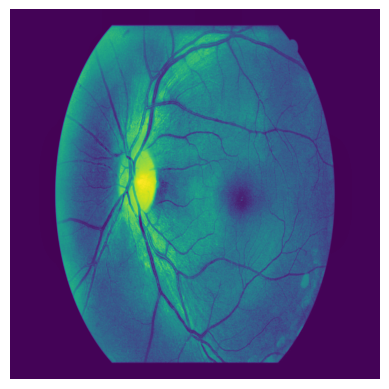

In [50]:
# # 将图像叠加并显示结果
# result_image = add_images(a)
# # 将结果数组转换为图像并显示
# result_image = Image.fromarray(result_image)
# result_image.show()



# 读取并显示图像

imgplot = plt.imshow(a1)
plt.axis('off')  # 隐藏坐标轴
plt.show()


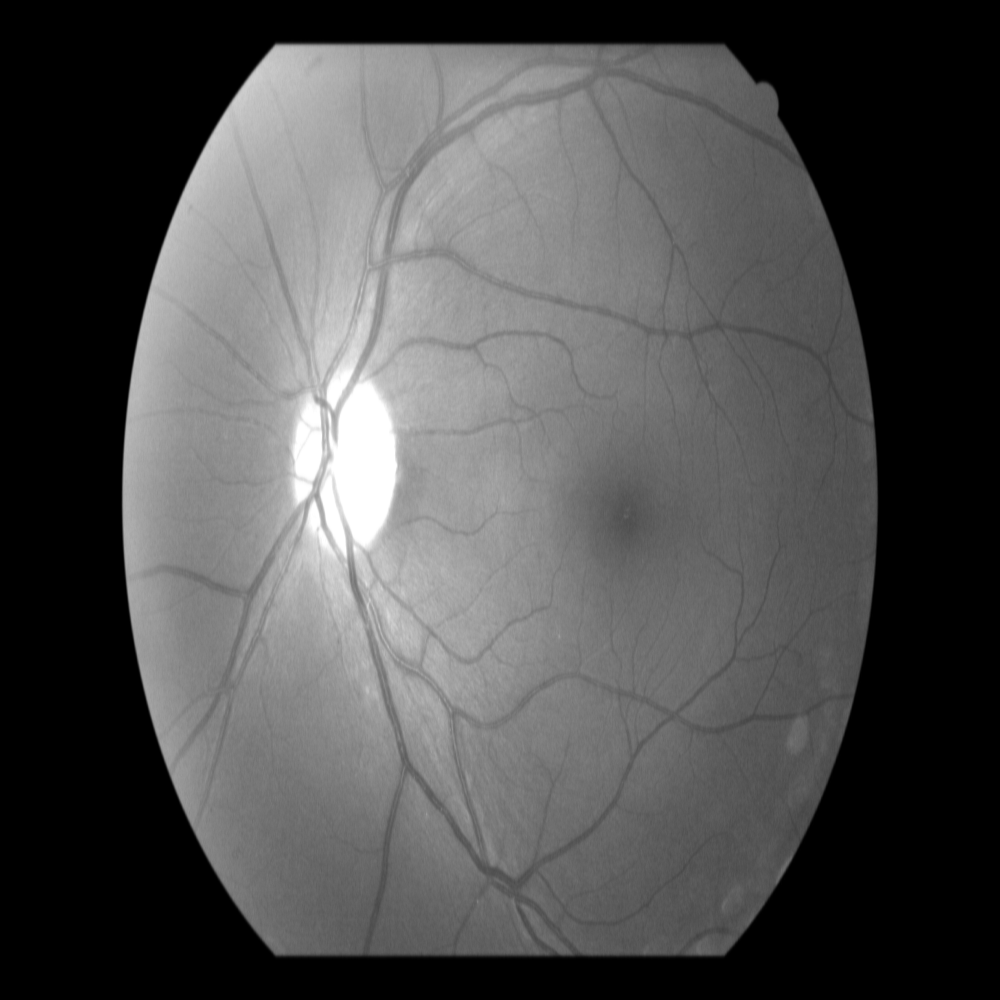

In [27]:
scaled_list

[]

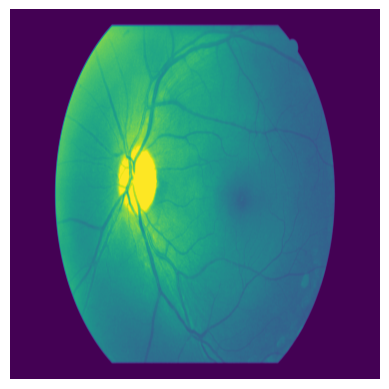

In [16]:

imgplot = plt.imshow(scaled_list[6])
plt.axis('off')  # 隐藏坐标轴
plt.show()

In [26]:
data_path="./dataset/"
root=data_path+'pre'+"image_train/"
root

'./dataset/preimage_train/'

In [27]:
root[:-1] + '_GT/'


'./dataset/preimage_train_GT/'